In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
# Load dataset
file_path = "motorbekas_clean.csv"
df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama
print("Data Awal:")
display(df.head())

df.info()


Data Awal:


,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,2020-03-01,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.0,BMW F 800 GT,2018-09-01,Gasoline,Manual,Used,ABS,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.0,Nova Motors Retro Star,2019-10-01,Gasoline,Manual,Used,ABS,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,90.0,Aprilia RSV4,2016-03-01,Gasoline,Manual,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.0,Kawasaki Ninja ZX-6R,2009-08-01,Gasoline,Manual,Used,ABS,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       34886 non-null  int64  
 1   mileage     34886 non-null  int64  
 2   power       34886 non-null  float64
 3   make_model  34886 non-null  object 
 4   date        34886 non-null  object 
 5   fuel        34886 non-null  object 
 6   gear        34886 non-null  object 
 7   offer_type  34886 non-null  object 
 8   version     34886 non-null  object 
 9   link        34886 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ MB


In [66]:
df['price'].describe()

count    3.488600e+04
mean     1.311268e+04
std      1.526043e+05
min      1.000000e+00
25%      6.999000e+03
50%      9.900000e+03
75%      1.250000e+04
max      9.999999e+06
Name: price, dtype: float64

In [67]:
#isnull
df.isnull().sum()

price         0
mileage       0
power         0
make_model    0
date          0
fuel          0
gear          0
offer_type    0
version       0
link          0
dtype: int64

In [68]:
# penanganan mising value
# Mengisi missing value dengan median untuk kolom numerik
for column in df.select_dtypes(include=np.number).columns:
    df[column] = df[column].fillna(df[column].median())

# Mengisi missing value dengan modus untuk kolom kategorikal
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [69]:
#duplikat
df.duplicated().sum()

5833

In [70]:
# prompt: code hapus duplikat

#hapus duplikat
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [71]:
from sklearn.preprocessing import LabelEncoder

for col in ['mileage','power','make_model','fuel','gear','offer_type']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) # Ganti df_model dengan df

In [72]:
df = df.drop('version', axis=1)
df = df.drop('link', axis=1)

In [73]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # pastikan konversi aman
df['date'] = df['date'].dt.year  # ambil tahunnya saja

# Lihat hasilnya
print(df[['date']].head())

   date
0  2020
1  2018
2  2019
3  2016
4  2009


In [74]:
# penskalaan
features = ['mileage', 'power', 'make_model', 'date', 'fuel','gear','offer_type']
x = df[features]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

features_to_scale = ['mileage', 'power', 'make_model', 'date', 'fuel','gear','offer_type']

x_train[features_to_scale] = scaler.fit_transform(x_train[features_to_scale])

x_test[features_to_scale] = scaler.transform(x_test[features_to_scale])

In [75]:
print(x)
print(y)

       mileage  power  make_model  date  fuel  gear  offer_type
0          132    159         705  2020     3     1           1
1         1481     65         137  2018     3     1           4
2          980      1        1407  2019     3     1           4
3         6514     65          67  2016     3     1           4
4         6600     93        1036  2009     3     1           4
...        ...    ...         ...   ...   ...   ...         ...
34880     2911     65         665  2019     3     1           4
34881     3962     91         215  2018     3     1           4
34882     7067     39         656  2004     3     1           4
34884     4170     40        1842  2018     3     1           4
34885     5690     33        2041  2018     3     0           4

[29053 rows x 7 columns]
0        23990
1         7500
2          800
3        14990
4         6200
         ...  
34880    36500
34881    17300
34882     8500
34884     8350
34885     8500
Name: price, Length: 29053, dtype: int64


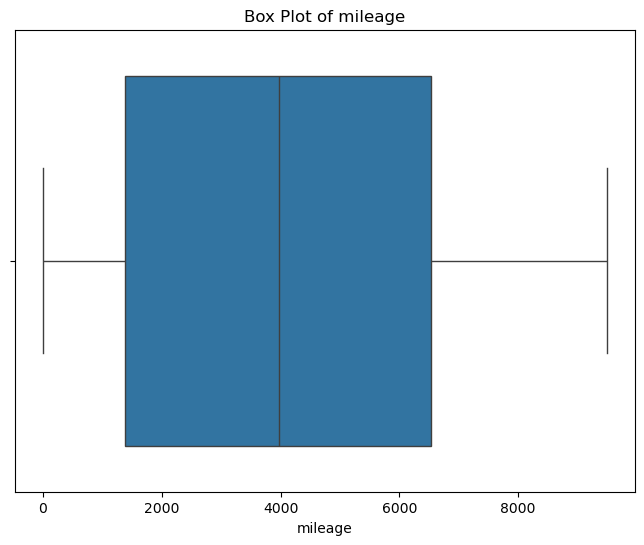

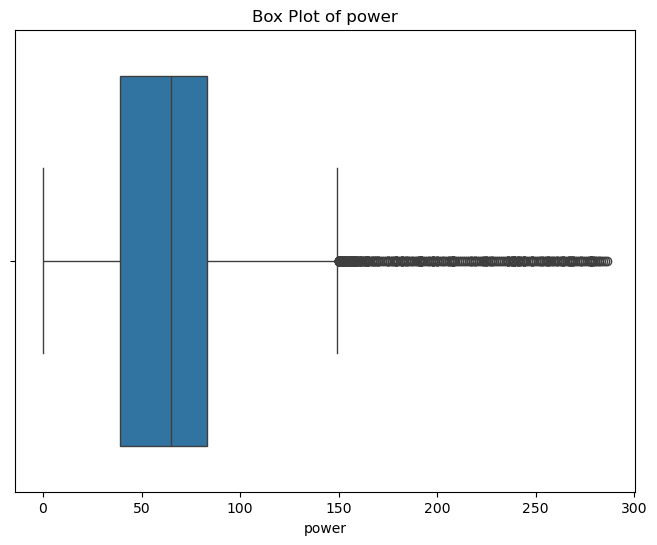

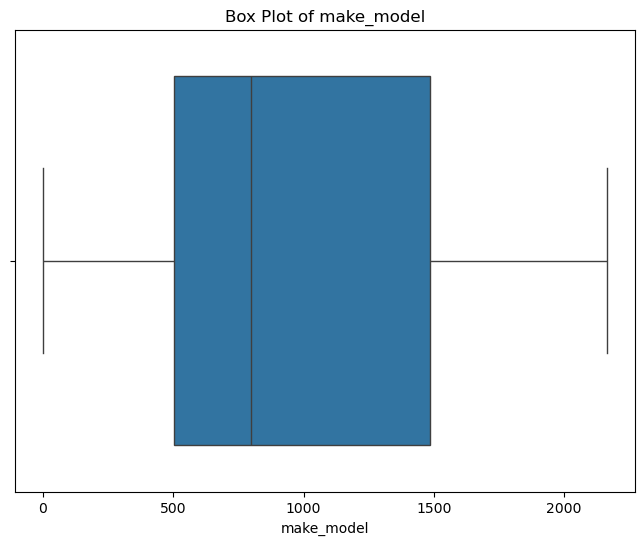

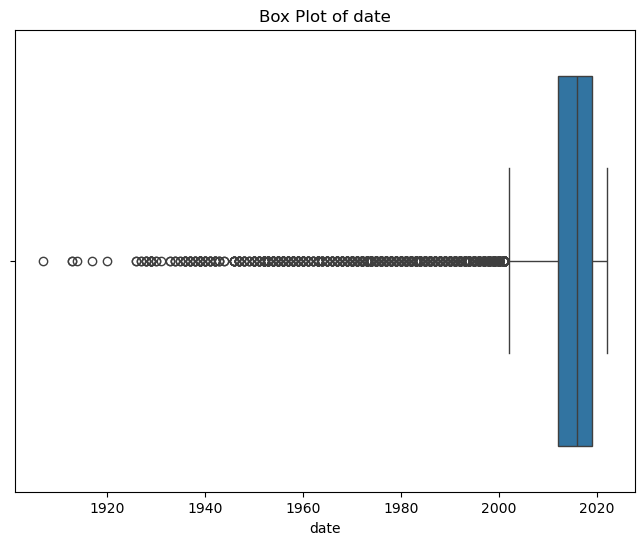

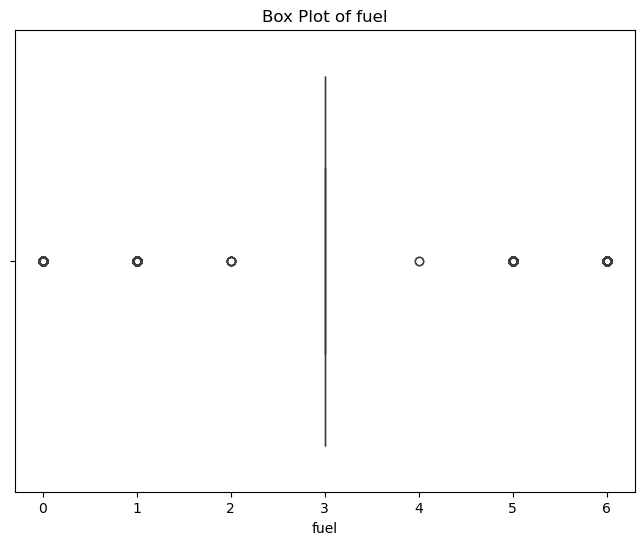

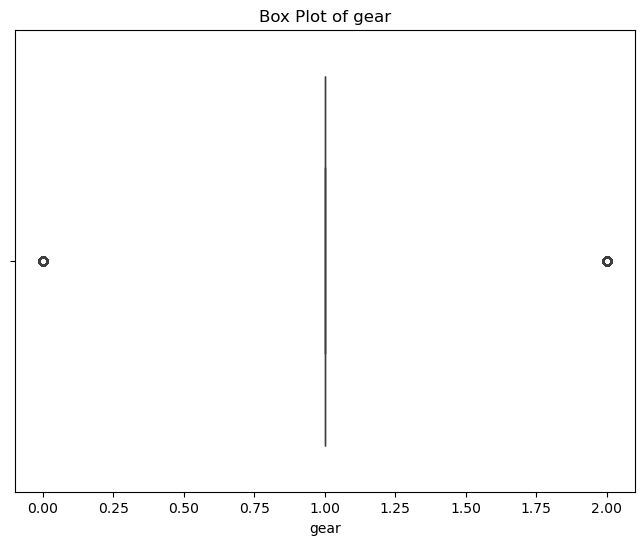

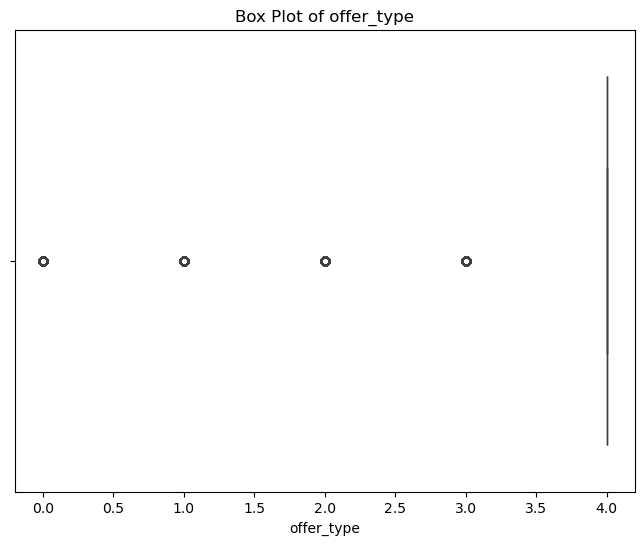

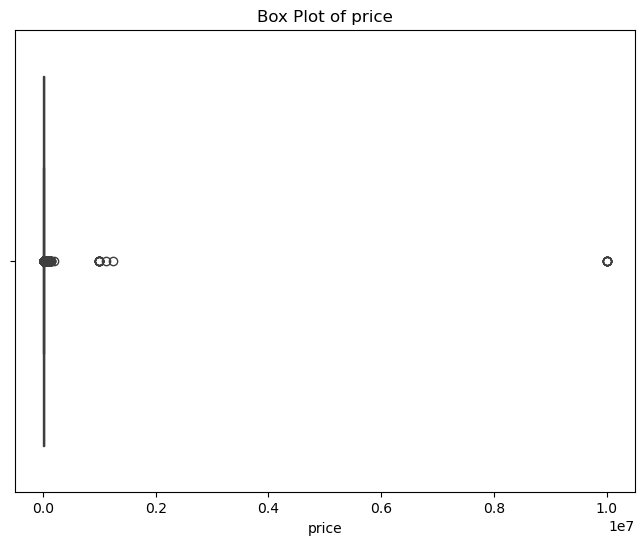

In [76]:
# Outlier
for feature in ['mileage', 'power', 'make_model', 'date', 'fuel','gear','offer_type','price']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [77]:
def cap_outliers(data, feature, lower_percentile=0.05, upper_percentile=0.95):
    """
    Fungsi untuk melakukan capping pada outlier.

    Args:
        data: DataFrame.
        feature: Nama kolom yang akan diproses.
        lower_percentile: Persentil bawah untuk menentukan batas bawah.
        upper_percentile: Persentil atas untuk menentukan batas atas.

    Returns:
        DataFrame dengan outlier yang sudah di-cap.
    """
    lower_bound = data[feature].quantile(lower_percentile)
    upper_bound = data[feature].quantile(upper_percentile)

    data[feature] = np.clip(data[feature], lower_bound, upper_bound)
    return data

# Terapkan capping pada fitur yang memiliki outlier
for feature in ['mileage', 'power', 'make_model', 'date', 'fuel','gear','offer_type','price']:
    df = cap_outliers(df, feature)

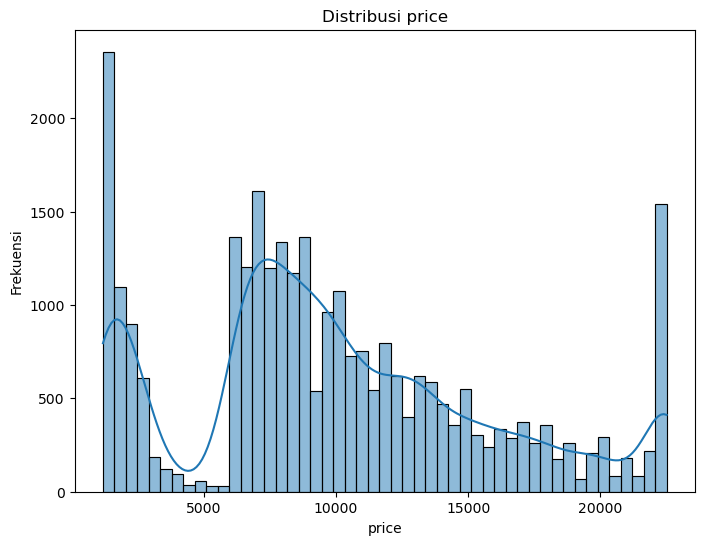

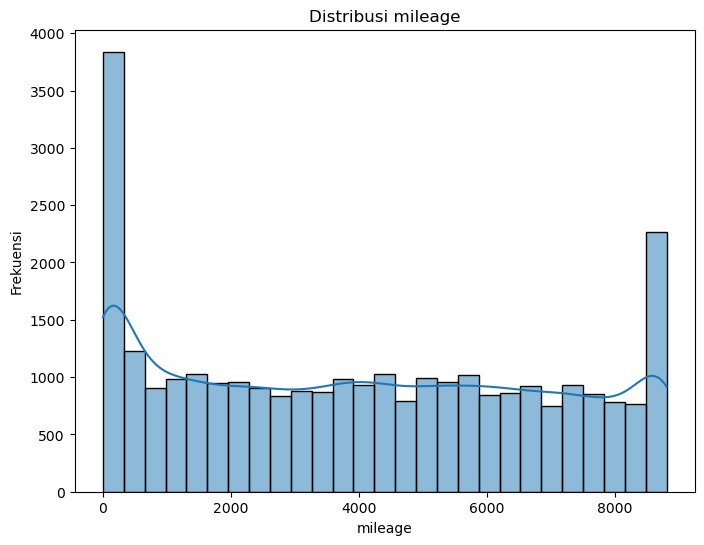

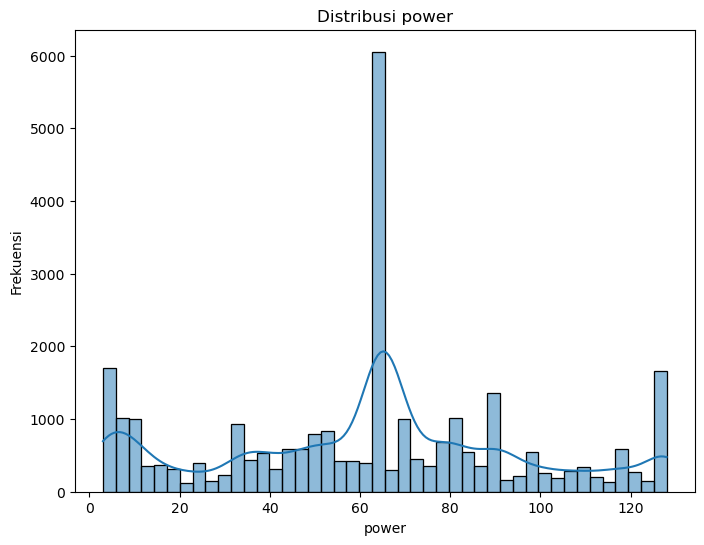

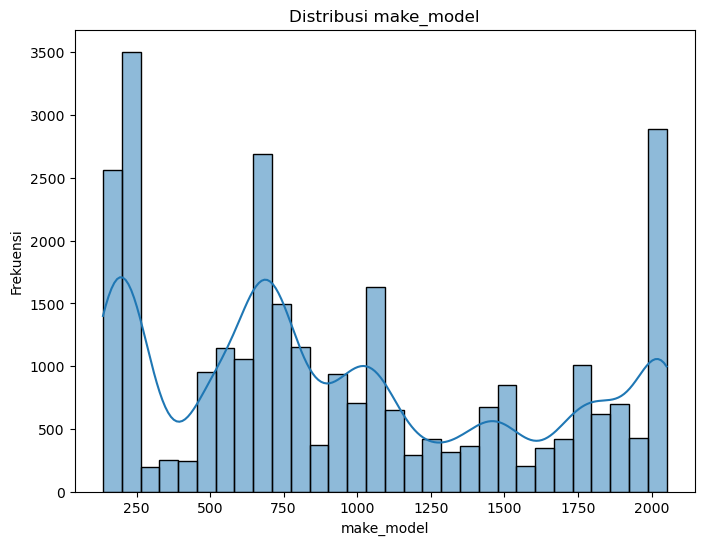

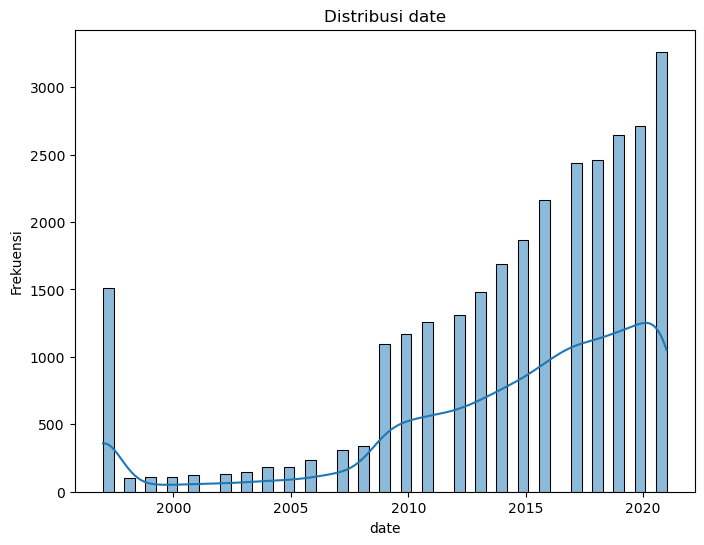

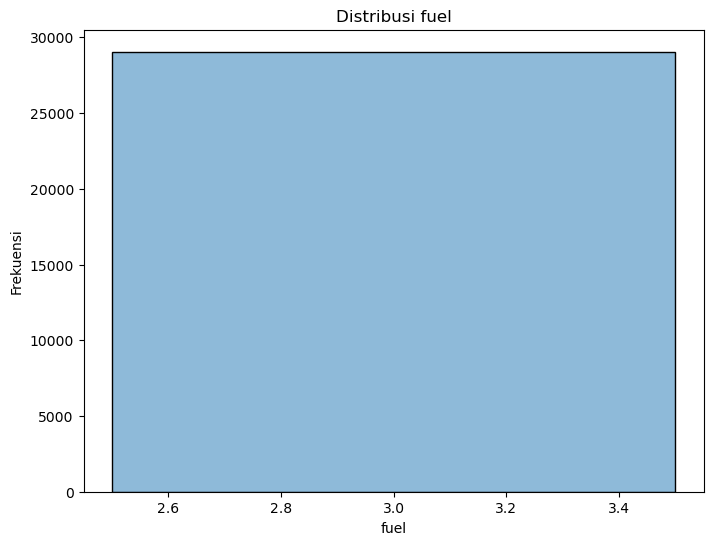

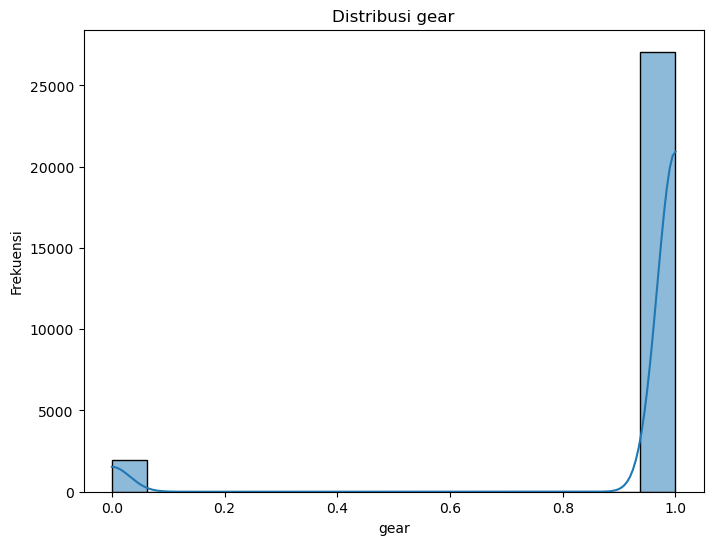

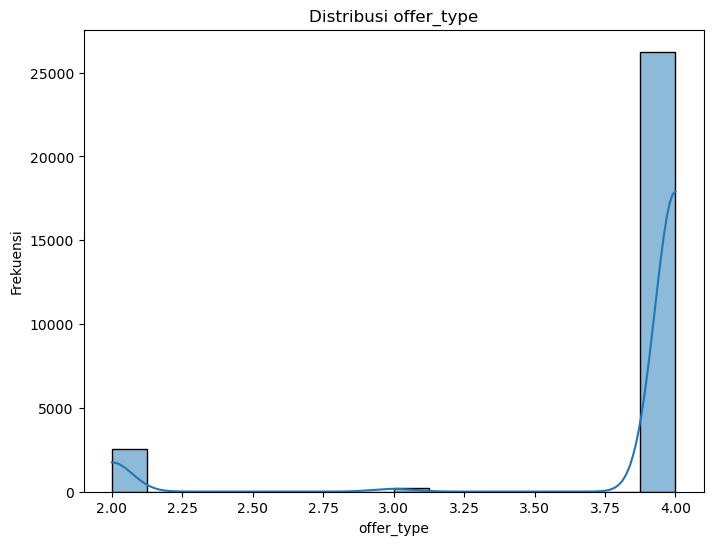

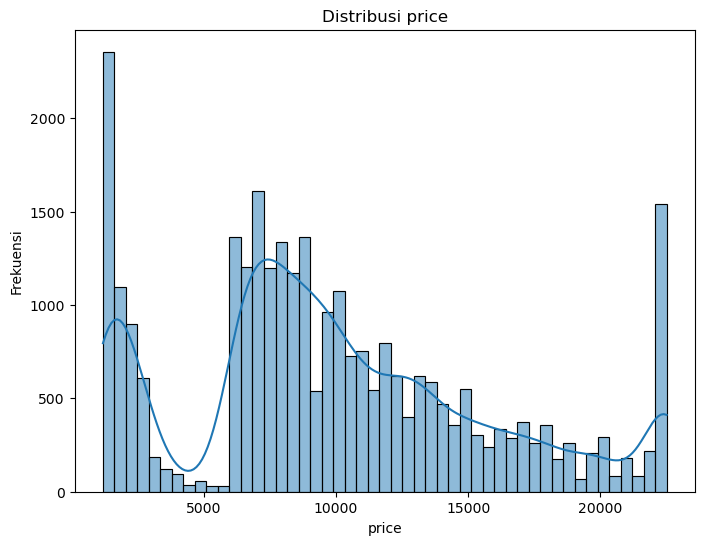

In [78]:
# Analisi Distribusi histogram
variables = ['price', 'mileage', 'power', 'make_model', 'date', 'fuel','gear','offer_type','price']

for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[variable], kde=True)
    plt.title(f'Distribusi {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frekuensi')
    plt.show()

In [79]:
features = ['mileage','power','make_model','date','fuel','gear']
x = df[features]
y = df['price']
x.shape, y.shape

((29053, 6), (29053,))

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=90)
y_test.shape

(7264,)

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold
rf = RandomForestRegressor(n_estimators=200, random_state=42)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
score = r2_score(y_test, pred)
print('Akurasi model Random Forest (R-squared) =', score)

Akurasi model Random Forest (R-squared) = 0.7667400443615187


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Assuming x_train and x_test are already defined from previous cells
x_train_rf = x_train  # Use your existing x_train
x_test_rf = x_test   # Use your existing x_test

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(x_train_rf, y_train)

# Prediksi pada data testing
y_pred = model.predict(x_test_rf)

# Hitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R-squared: 0.7667
Mean Squared Error (MSE): 7870596.93
Root Mean Squared Error (RMSE): 2805.46


In [83]:
import pickle

In [84]:
import pickle

filename = 'motormodel.sav'
pickle.dump(rf, open(filename, 'wb'))